# Beautiful Graphs with Seaborn
> In a previous tutorial, we slightly covered matplotlib. Why would you want to learn Seaborn instead?
> A quick answer is that Seaborn offers a lot more features such as:
> * A dataset-oriented API for examining relationships between multiple variables
* Convenient views onto the overall structure of complex datasets
* Concise control over matplotlib figure styling with several built-in themes
* Tools for choosing color palettes that faithfully reveal patterns in your data  

> Oh yeah and the main reason is that Seaborn is a lot prettier than matplotlib!

In [1]:
# this line allows matplotlib and seaborn's plot top be shown directly in the jupyter notebook 
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 


## Introduction 
#### Why is it so important to have good and pretty visualisation tools? 
> Because nobody cares about your work if you cannot demonstrate its worth properly. 
>
#### The data we will be using
> We will be using datasets directly provided by seaborn as they offer good visualisations properties. You
>can see all the available datasets at https://github.com/mwaskom/seaborn-data



## Basic plot: the `relplot`

In [2]:
fmri_data = sns.load_dataset("gammas")
fmri_data.head(1) # what does our dataset looks like


,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433


In [3]:
# keep only the first 5 subjects
fmri_subset = fmri_data[fmri_data.subject < 6]
fmri_subset.shape

(1800, 4)

> Now that we have the fmri data for only the first 5 subjects, let's plot it.


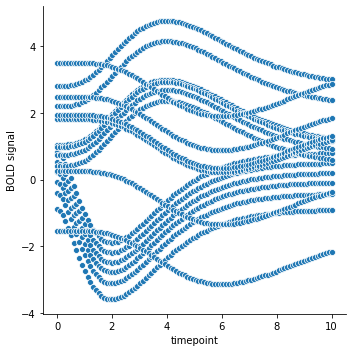

In [4]:
# timepoint is a column in our dataframe, so is BOLD signal
sns.relplot(x="timepoint", y="BOLD signal", data=fmri_subset)


### Exercise !
> Please explain why we have so many lines on our graph?



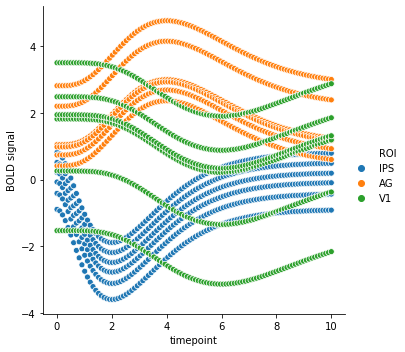

In [5]:
# ROI is also a column in our dataframe
sns.relplot(x="timepoint", y="BOLD signal", hue="ROI", data=fmri_subset)

> Right, now it is easier to understand the graph. The `hue` parameters refers to which column apply a color 
>seperation on its categorial values. We need a way to also visually distinguish the subjects. We will use the 
>`style` parameter which determines how to plot the dots depending on a column and its categorical values.




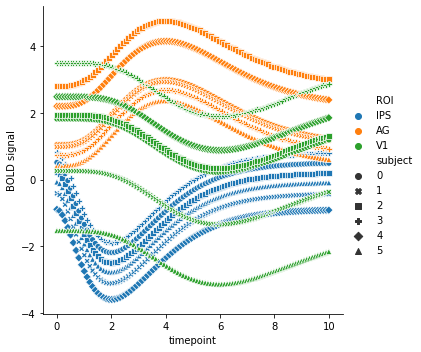

In [6]:
# the "subject" is a row in our dataframe
sns.relplot(x="timepoint", y="BOLD signal", hue="ROI", style="subject", data=fmri_subset)


> It's kind of hard to visualize the shapes of the dots, let's zoom a bit. For this task, we need to explain what are
> `FacetGrid` instances.  
> A `FacetGrid` is a multi-plot grid for plotting conditional relationships. Look at what a relplot returns:



seaborn.axisgrid.FacetGrid

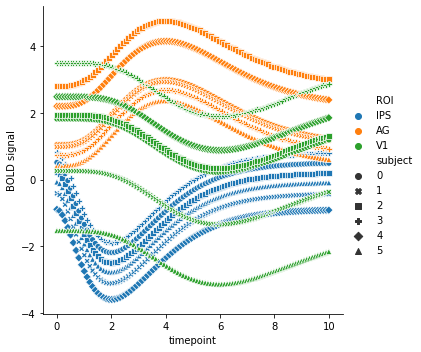

In [7]:
g = sns.relplot(x="timepoint", y="BOLD signal", hue="ROI", style="subject", data=fmri_subset)
type(g)

> Indeed, a `relplot` returns a `FacetGrid`. A `FacetGrid` is a collection of plots arranged together. Let's see a 
>simple example. 



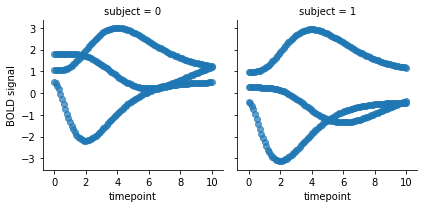

In [8]:
two_subjects = fmri_data[fmri_data.subject.isin([0,1])]

# subject is a column of two_subjects
g = sns.FacetGrid(data=two_subjects, col="subject")

# notice that we are using matplotlib.pyplot `scatter` function
# the alphas is the transparency factor in the plt.scatter function
g.map(plt.scatter, "timepoint", "BOLD signal", alpha=0.7)
g

> Let's add a bit of details on the previous plot




/home/mystery/Programs/anaconda3/envs/tutoriels/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


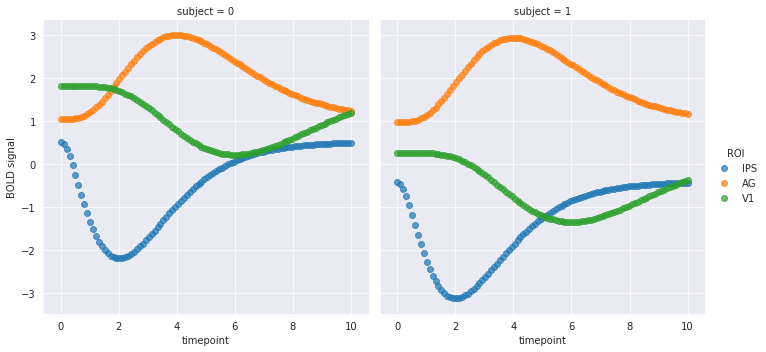

In [9]:
def plot_simple_facet(plotting_fct):
    with sns.axes_style("darkgrid"):
        g = sns.FacetGrid(data=two_subjects, col="subject", hue="ROI", size=5 )
        g.map(plotting_fct , "timepoint", "BOLD signal", alpha=0.7)
        g.add_legend() 
        return g
    
plot_simple_facet(plt.scatter)

> Let's analyse the previous cell line by line.  
> `with sns.axes_style('darkgrid'):`  
> Here we change the style of our plots momentarily (in the indented block following the `with` statement). We will go
> back to the different styles that seaborn offers later on.   
> `g = sns.FacetGrid(data=two_subjects, col="subject", hue="ROI", size=5 )`  
> Here we assign to `g` a FacetGrid with the two_subjects as the data. Then, we want to create the plot's columns 
>based on the number of values of the column subject in our dataframe. Since only 2 subjects were considered in our 
>dataframe, 2 columns will be generated (2 plots). The `hue` parameter was seen before and the `size` parameter 
>allows us to modify the size of our plots (the default value is 3).  
> `g.map(plt.scatter , "timepoint", "BOLD signal", alpha=0.7)`  
> We now map a plotting function from pyplot (`plt.scatter`) in our `FacetGrid`. The first argument is the x vector 
>for the `plt.scatter` function, the second argument is the y vector and the third argument is the alpha setting 
>which controls the opacity.  
> `g.add_legend()`  
> We manually add a legend to our `FacetGrid`.

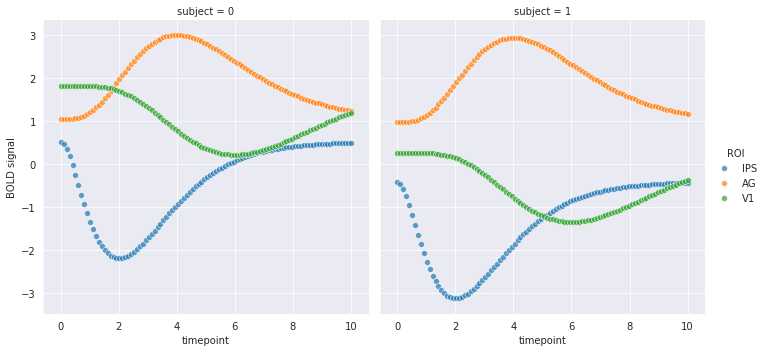

In [10]:
# trying a different plotting function
plot_simple_facet(sns.scatterplot)

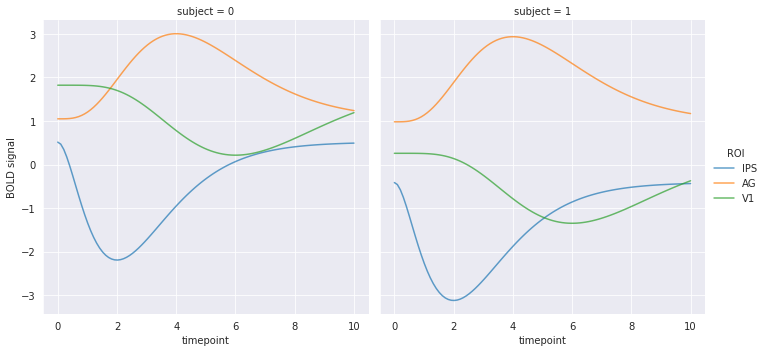

In [11]:
# trying a different plotting function
plot_simple_facet(sns.lineplot)


## Size and axes limits
> In this section, we will look at a very busy dataset and how we split it to graphically understand its content.

In [12]:
diamonds_df = sns.load_dataset("diamonds")
diamonds_df.head(1)
# let's compute the volume
diamonds_df['volume'] = diamonds_df.x * diamonds_df.y * diamonds_df.z

plotting_df = diamonds_df.drop(['carat', 'clarity', 'table', 'depth', 'x', 'y', 'z'], axis=1)

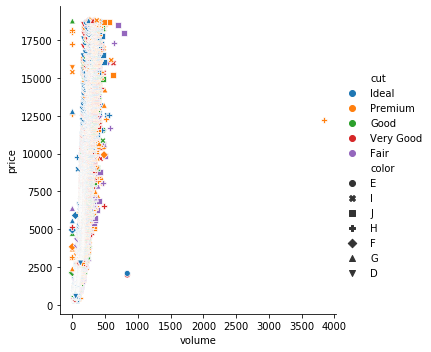

In [13]:
sns.relplot(x="volume", y="price", hue="cut", style="color", data=plotting_df)


(0, 1000)

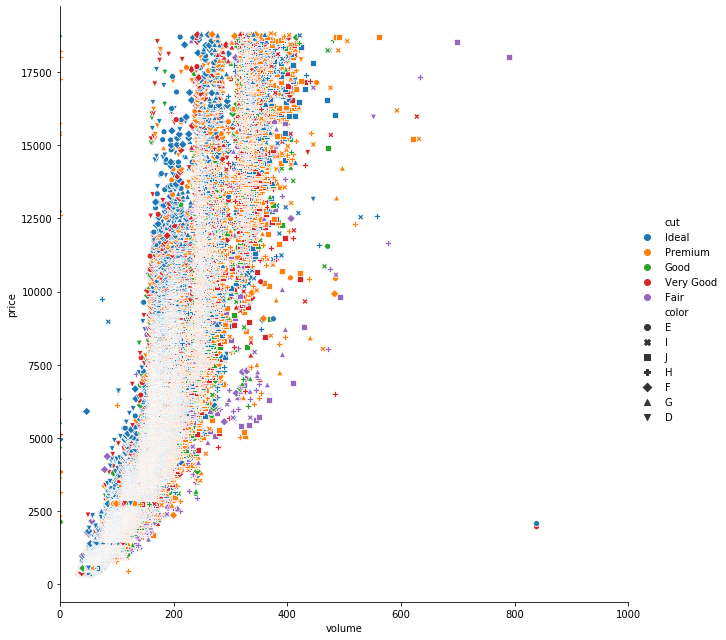

In [14]:
# default plot
g = sns.relplot(x="volume", y="price", hue="cut", style="color", height=9, aspect=1, data=plotting_df)
g.ax.set_xlim(0, 1000)

> The previous initial plot is crap, it's way to hard to interpret. Before improving it, let's start by explaining 
>the new concept and parameters introduced.  
>`height=9, aspect=1`  
>These two parameters determine the size of the plot. We kept the default value of aspect and we scaled the height 
>from the default value of 5 all the way to 9.  
>`g.ax.set_xlim(0, 1000)`  
>Here we retrieve the `ax` attribute from the `FacetGrid`. The `ax` attribute belongs to the underlying axes class 
>from `matplotlib`. Remember that `seaborn` is built on top of `matplotlib`. The complete list of attributes that you
> can use to modify your axes can be fond in the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib
>.pyplot.axes.html). 



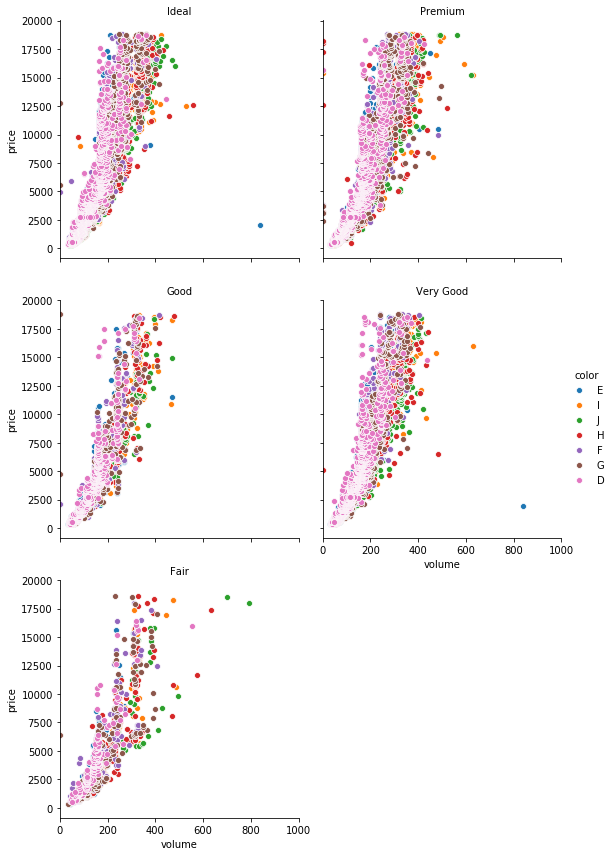

In [15]:
g = sns.FacetGrid(plotting_df, col="cut", col_wrap=2, xlim=(0,1000), hue="color", size=4)
g.map(sns.scatterplot, "volume", "price")
g.add_legend()
g.set_titles("{col_name}")

> In the previous cell, we split the original plot into 5 plots, one for each `cut`. We used the `col_wrap` attribute
> in order to get 3 rows (each row wrapped after 2 columns). 

## Visuals and aesthetics
> Now that we know how to properly set up our graphs and modify their size and shape, let's dwelve into the aesthetic
> parts of `seaborn`. 
>The most general level of control comes from the 5 preset seaborn themes: `ticks`, `white`, `dark`, `whitegrid`, 
>`darkgrid`.

In [16]:
fmri_data2 = sns.load_dataset("fmri")
single_fmri = fmri_data2[fmri_data.subject=="s0"].drop(['event', 'region'], axis=1)
single_fmri.head(1)

/home/mystery/Programs/anaconda3/envs/tutoriels/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/mystery/Programs/anaconda3/envs/tutoriels/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,subject,timepoint,signal


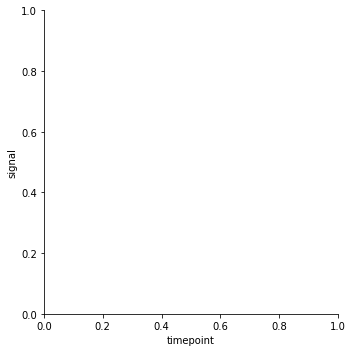

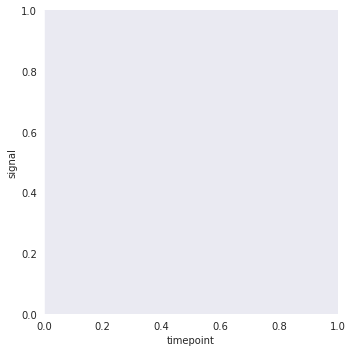

In [19]:
sns.relplot(x="timepoint", y="signal", data=single_fmri)

sns.set_style("dark")

sns.relplot(x="timepoint", y="signal", data=single_fmri)

